# ЛР №3 Рудзинский В. В. ИУ5-63Б

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

In [4]:
from sklearn.model_selection import train_test_split

In [53]:
data = pd.read_csv('data.csv')

In [54]:
data.head(50)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [55]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [56]:
data.drop(['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style'], axis = 1, inplace = True)
#Удалю ненужные столбцы

In [57]:
data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


In [58]:
data.isnull().sum()

Year                 0
Engine HP           69
Engine Cylinders    30
Number of Doors      6
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Заполним null'ы

In [59]:
data['Engine HP'] = data['Engine HP'].fillna(data['Engine HP'].mean())

In [60]:
data['Engine Cylinders'] = data['Engine HP'].fillna(data['Engine HP'].mean())

In [61]:
data['Number of Doors'] = data['Engine HP'].fillna('4.0')

In [62]:
data.isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

In [63]:
data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,335.0,335.0,26,19,3916,46135
1,2011,300.0,300.0,300.0,28,19,3916,40650
2,2011,300.0,300.0,300.0,28,20,3916,36350
3,2011,230.0,230.0,230.0,28,18,3916,29450
4,2011,230.0,230.0,230.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,300.0,300.0,23,16,204,46120
11910,2012,300.0,300.0,300.0,23,16,204,56670
11911,2012,300.0,300.0,300.0,23,16,204,50620
11912,2013,300.0,300.0,300.0,23,16,204,50920


In [65]:
parts = np.split(data, [7,8], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

      Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
0  2011.0      335.0             335.0            335.0         26.0   
1  2011.0      300.0             300.0            300.0         28.0   
2  2011.0      300.0             300.0            300.0         28.0   
3  2011.0      230.0             230.0            230.0         28.0   
4  2011.0      230.0             230.0            230.0         28.0   

   city mpg  Popularity  
0      19.0      3916.0  
1      19.0      3916.0  
2      20.0      3916.0  
3      18.0      3916.0  
4      18.0      3916.0   

Выходные данные:

       MSRP
0  46135.0
1  40650.0
2  36350.0
3  29450.0
4  34500.0


#   Разделение выборки

In [66]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.03)

In [67]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

         Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
605   2002.0      515.0             515.0            515.0         15.0   
5891  2017.0      152.0             152.0            152.0         36.0   
7176  2004.0      132.0             132.0            132.0         29.0   
4355  2008.0      292.0             292.0            292.0         19.0   
5610  2012.0      200.0             200.0            200.0         31.0   

      city mpg  Popularity  
605        9.0      2774.0  
5891      27.0       640.0  
7176      22.0      1851.0  
4355      13.0      5657.0  
5610      21.0       873.0   

Входные параметры тестовой выборки:

         Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
412   2015.0      240.0             240.0            240.0         34.0   
8278  2015.0      340.0             340.0            340.0         23.0   
9452  2007.0      195.0             195.0            195.0         21.0

In [68]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#Проверим правильность и узнаем размеры матриц

(11556, 7)
(358, 7)
(11556, 1)
(358, 1)


# Модель ближайших соседей для произвольного гиперпараметра K

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)
#Решение задачи регрессии методом 2, 5 и 10 ближайших соседей

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [73]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений:

 [[42775. ]
 [81465. ]
 [21820.5]
 [18282.5]
 [24967. ]] 
 ...


# Оценка качества регрессии (Метрики качества)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score , accuracy_score

In [75]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 4555.632681564246
Средняя абсолютная ошибка для 5 ближайших соседей: 4406.08938547486
Средняя абсолютная ошибка для 10 ближайших соседей: 5272.52905027933


In [76]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 100956147.18086593
Средняя квадратичная ошибка для 5 ближайших соседей: 81646619.39351955
Средняя квадратичная ошибка для 10 ближайших соседей: 104576751.75865921


In [77]:
# Оценка коэффициента детерминации
print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN
))

Коэффициент детерминации для 2 ближайших соседей: 0.9468187512944745
Коэффициент детерминации для 5 ближайших соседей: 0.9569905420008431
Коэффициент детерминации для 10 ближайших соседей: 0.9449115046542967


# Grid Search (решетчатый поиск)

In [78]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Подбор гиперпараметров

GridSearch через среднюю квадратичную ошибку

Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [79]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [80]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=2)

Лучшее число ближайших соседей:

 {'n_neighbors': 2}

Лучшее значение средней квадратичной ошибки:

 -516075138.80224097


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



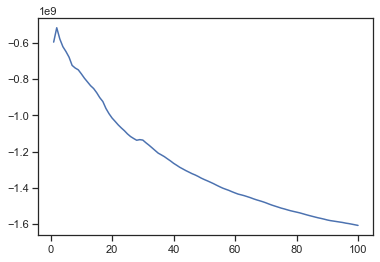

In [81]:
print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

# GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(n_neighbors=2)

Лучшее число ближайших соседей:

 {'n_neighbors': 2}

Лучшее значение коэффициента детерминации:

 0.8765235543032865

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



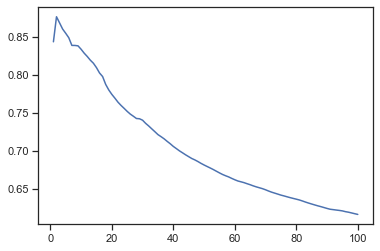

In [82]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

# Кросс-валидация

In [83]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [0.88130343 0.51969584 0.45513171 0.44947672 0.46323985] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.025620454331758857 

- 5 ближайших соседей: 0.4994406331573339 

- 10 ближайших соседей: 0.5537695098685809 

- 50 ближайших соседей: 0.5593036663617218 

- 100 ближайших соседей: 0.5181991408668594 

